In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 9, 3, 12, 35, 39, 139844)

In [3]:
import zipfile

In [4]:
# download 10_food_class_data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-09-03 12:35:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.9MB/s    in 13s     

2023-09-03 12:35:52 (39.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
# unzip
zip_ref = zipfile.ZipFile('/content/10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [6]:
# walk through the dataset
import os
for dir_path, dir_names, file_names in os.walk('/content/10_food_classes_all_data'):
  print(f'there are {len(dir_names)} directories , {len(file_names)} images in {dir_path}')

there are 2 directories , 0 images in /content/10_food_classes_all_data
there are 10 directories , 0 images in /content/10_food_classes_all_data/test
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/grilled_salmon
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/chicken_curry
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/sushi
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/hamburger
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/chicken_wings
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/steak
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/fried_rice
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/ramen
there are 0 directories , 250 images in /content/10_food_classes_all_data/test/pizza
there are 0 directories , 250 images in /content/10

In [7]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [9]:
# Create a method to view random 3 images
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def random_three_images(target_dir, target_class):
  '''
  A method to view ramdom three images for folder type dataset.

  Arg:
  ---
  target_dir: The full image dataset directory.
  target_class: The class in the directory from where you want to pick and show.

  '''
  plt.figure(figsize=(10,7))
  for i in range(3):
    plt.subplot(1, 3, i+1)
    target_folder = target_dir +'/'+ target_class
    # get random image path
    image_path = random.sample(os.listdir(target_folder), 1)

    # read the image
    image = mpimg.imread(target_folder + "/" + image_path[0])
    plt.imshow(image)
    plt.title(target_class)

  return image





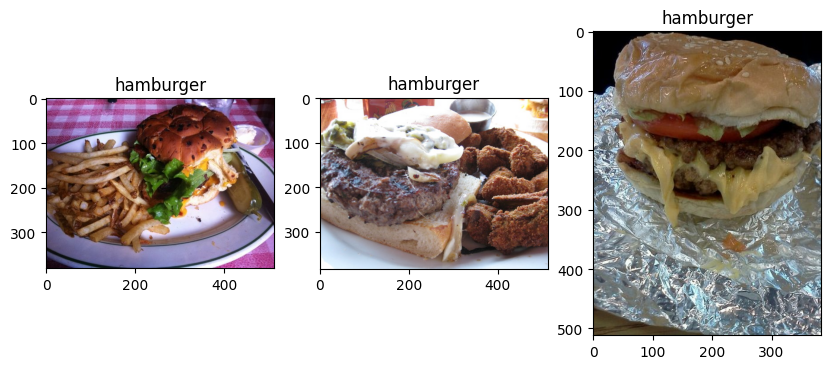

In [10]:
image = random_three_images(train_dir, target_class='hamburger')

In [11]:
image

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 76,  65,  37],
        [ 81,  70,  42],
        [ 86,  72,  45],
        ...,
        [248, 250, 247],
        [252, 252, 250],
        [249, 251, 248]],

       [[ 85,  74,  46],
        [ 89,  78,  50],
        [ 91,  80,  52],
        ...,
        [244, 245, 240],
        [255, 255, 251],
        [235, 236, 231]],

       [[ 86,  75,  47],
        [ 88,  77,  49],
        [ 86,  75,  47],
        ...,
        [245, 244, 240],
        [252, 251, 246],
        [250, 249, 244]]

In [12]:
norm_image = image/255.

In [13]:
norm_image

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.29803922, 0.25490196, 0.14509804],
        [0.31764706, 0.2745098 , 0.16470588],
        [0.3372549 , 0

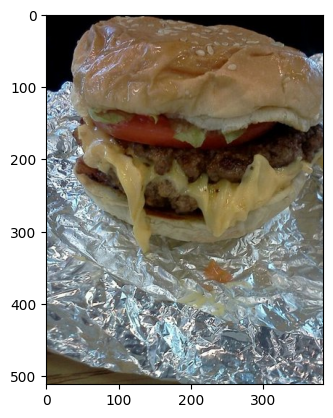

In [14]:
plt.imshow(norm_image)

In [15]:
image.shape

(512, 384, 3)

In [16]:
# Create train and validation data using ImageDataGenarator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# rescale datagen
train_datagen = ImageDataGenerator(1/255.)
valid_datagen = ImageDataGenerator(1/255.)

# craete train and validation dataset
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'categorical',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'categorical',
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [17]:
len(train_data), len(valid_data)

(235, 79)

In [18]:
# create a normal classification model as base model
#from tensorflow.keras.optimizers.legacy import Adam
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_1')

# Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
235/235 [==============================] - 37s 128ms/step - loss: 2.9745 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 25s 105ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 24s 102ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 25s 105ms/step - loss: 2.3028 - accuracy: 0.0957 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 25s 107ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000


In [19]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 602,186
Trainable params: 602,186
Non-trainable params: 0
_________________________________________________________________


<Axes: >

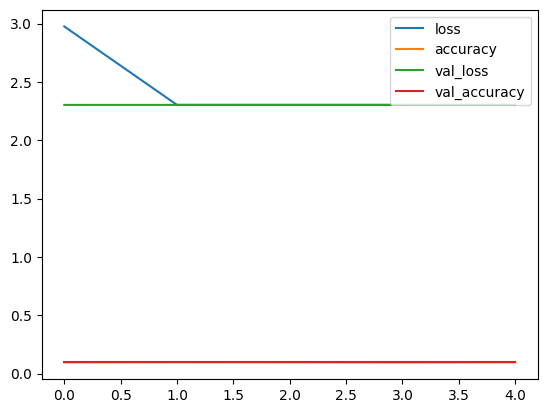

In [20]:
import pandas as pd
pd.DataFrame(history_model_1.history).plot()

In [21]:
# create another model with more nurons

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_2')

# compile
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# fit the model
history_model_2 = model_2.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 27s 108ms/step - loss: 638.5540 - accuracy: 0.1035 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 26s 110ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 2.3028 - accuracy: 0.0943 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 26s 109ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 25s 107ms/step - loss: 2.3028 - accuracy: 0.0929 - val_loss: 2.3062 - val_accuracy: 0.1000


In [22]:
# Create a convolutional neural net. model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_model_3 = model_3.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 35s 118ms/step - loss: 166.4149 - accuracy: 0.1169 - val_loss: 3.3289 - val_accuracy: 0.1488
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.4512 - accuracy: 0.5395 - val_loss: 3.1933 - val_accuracy: 0.1584
Epoch 3/5
235/235 [==============================] - 27s 117ms/step - loss: 0.6594 - accuracy: 0.8228 - val_loss: 3.8521 - val_accuracy: 0.1716
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 0.3138 - accuracy: 0.9285 - val_loss: 4.5132 - val_accuracy: 0.1684
Epoch 5/5
235/235 [==============================] - 32s 137ms/step - loss: 0.1875 - accuracy: 0.9636 - val_loss: 5.3103 - val_accuracy: 0.1668


In [23]:
# train data augmentation
train_augmented_datagen = ImageDataGenerator(rescale=(1/255.),
                                             rotation_range=20,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_augmented_data = train_augmented_datagen.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224, 224),
                                                                   class_mode='categorical',
                                                                   shuffle=True #default is true
                                                                   )

Found 7500 images belonging to 10 classes.


In [24]:
# Fit model_3 with train_augmented_data
history_4_model_3 = model_3.fit(train_augmented_data,
                                epochs=5,
                                steps_per_epoch=len(train_augmented_data),
                                validation_data=valid_data,
                                validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 105s 445ms/step - loss: 2.2479 - accuracy: 0.1648 - val_loss: 7.0411 - val_accuracy: 0.1832
Epoch 2/5
235/235 [==============================] - 104s 443ms/step - loss: 2.1680 - accuracy: 0.2179 - val_loss: 9.5765 - val_accuracy: 0.1868
Epoch 3/5
235/235 [==============================] - 109s 463ms/step - loss: 2.1141 - accuracy: 0.2408 - val_loss: 14.8681 - val_accuracy: 0.2040
Epoch 4/5
235/235 [==============================] - 104s 442ms/step - loss: 2.0785 - accuracy: 0.2588 - val_loss: 24.8402 - val_accuracy: 0.1908
Epoch 5/5
235/235 [==============================] - 104s 441ms/step - loss: 2.0692 - accuracy: 0.2680 - val_loss: 26.4049 - val_accuracy: 0.1844


In [25]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 121000)            0         
                                                                 
 dense_6 (Dense)             (None, 10)                1210010   
                                                                 
Total params: 1,211,200
Trainable params: 1,211,200
Non-trainable params: 0
______________________________________________

In [26]:
from keras.layers import MaxPool2D
# increase model complexity
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224,3),
                           activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_5')

# Compile
model_5.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_model_5 = model_5.fit(train_augmented_data,
                              epochs=10,
                              steps_per_epoch=len(train_augmented_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/10
235/235 [==============================] - 108s 446ms/step - loss: 2.2039 - accuracy: 0.1831 - val_loss: 299.9832 - val_accuracy: 0.1120
Epoch 2/10
235/235 [==============================] - 105s 447ms/step - loss: 2.1063 - accuracy: 0.2400 - val_loss: 125.4013 - val_accuracy: 0.1940
Epoch 3/10
235/235 [==============================] - 104s 442ms/step - loss: 2.0646 - accuracy: 0.2592 - val_loss: 116.5229 - val_accuracy: 0.2404
Epoch 4/10
235/235 [==============================] - 107s 454ms/step - loss: 2.0292 - accuracy: 0.2800 - val_loss: 131.4330 - val_accuracy: 0.2524
Epoch 5/10
235/235 [==============================] - 106s 453ms/step - loss: 1.9926 - accuracy: 0.2996 - val_loss: 141.0470 - val_accuracy: 0.2688
Epoch 6/10
235/235 [==============================] - 105s 446ms/step - loss: 1.9647 - accuracy: 0.3143 - val_loss: 114.2352 - val_accuracy: 0.2820
Epoch 7/10
235/235 [==============================] - 107s 454ms/step - loss: 1.9413 - accuracy: 0.3205 - val_lo

In [27]:
# working with lr-callback
#from keras.layers import MaxPool2D
# increase model complexity
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224,3),
                           activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_6')

# Compile
model_6.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_model_6 = model_6.fit(train_augmented_data,
                              epochs=40,
                              steps_per_epoch=len(train_augmented_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data),
                              callbacks=[lr_scheduler])

Epoch 1/40
235/235 [==============================] - 107s 441ms/step - loss: 2.2219 - accuracy: 0.1660 - val_loss: 245.4007 - val_accuracy: 0.1112 - lr: 0.0010
Epoch 2/40
235/235 [==============================] - 104s 443ms/step - loss: 2.0984 - accuracy: 0.2504 - val_loss: 184.4767 - val_accuracy: 0.1660 - lr: 0.0011
Epoch 3/40
235/235 [==============================] - 110s 469ms/step - loss: 2.0451 - accuracy: 0.2779 - val_loss: 103.2522 - val_accuracy: 0.2048 - lr: 0.0013
Epoch 4/40
235/235 [==============================] - 104s 444ms/step - loss: 1.9908 - accuracy: 0.2992 - val_loss: 183.3478 - val_accuracy: 0.2300 - lr: 0.0014
Epoch 5/40
235/235 [==============================] - 110s 466ms/step - loss: 1.9710 - accuracy: 0.3145 - val_loss: 108.2515 - val_accuracy: 0.2836 - lr: 0.0016
Epoch 6/40
235/235 [==============================] - 105s 446ms/step - loss: 1.9474 - accuracy: 0.3187 - val_loss: 122.2046 - val_accuracy: 0.2508 - lr: 0.0018
Epoch 7/40
235/235 [==============

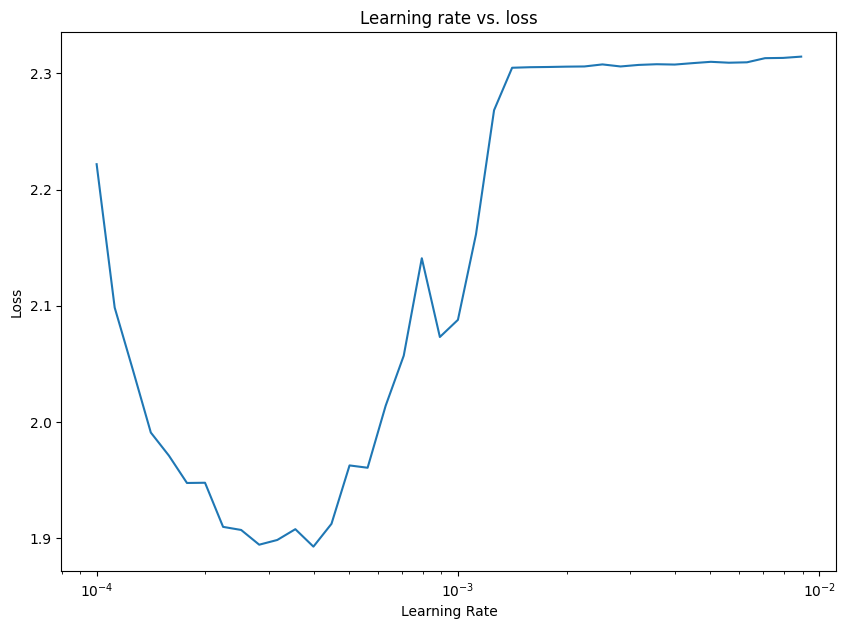

In [30]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_model_6.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");


In [35]:
# Clone the model (use the same architecture)
model_7 = tf.keras.models.clone_model(model_5)

# compile
model_7.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0005),
                metrics=['accuracy'])

# Fit the model
history_model_7 = model_7.fit(train_augmented_data,
                              epochs=5,
                              steps_per_epoch=len(train_augmented_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 107s 443ms/step - loss: 2.2325 - accuracy: 0.1587 - val_loss: 116.4663 - val_accuracy: 0.1804
Epoch 2/5
235/235 [==============================] - 105s 445ms/step - loss: 2.1410 - accuracy: 0.2169 - val_loss: 90.5285 - val_accuracy: 0.2452
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.1031 - accuracy: 0.2401 - val_loss: 147.0257 - val_accuracy: 0.2352
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0256 - accuracy: 0.2803 - val_loss: 122.9397 - val_accuracy: 0.2528
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9891 - accuracy: 0.2953 - val_loss: 191.5856 - val_accuracy: 0.2092


In [33]:
from keras.layers import MaxPool2D
# increase model complexity
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224,3),
                           activation='relu'),
    #tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    #tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    #tf.keras.layers.Conv2D(10, 3, activation='relu'),
    #tf.keras.layers.Conv2D(10, 3, activation='relu'),
    #tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
], name='model_8')

# Compile
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_model_8 = model_8.fit(train_augmented_data,
                              epochs=5,
                              steps_per_epoch=len(train_augmented_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 2.1397 - accuracy: 0.2309

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


235/235 [==============================] - 109s 458ms/step - loss: 2.1397 - accuracy: 0.2309 - val_loss: 210.1627 - val_accuracy: 0.2196
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.0266 - accuracy: 0.2857 - val_loss: 218.7119 - val_accuracy: 0.2052
Epoch 3/5
235/235 [==============================] - 101s 430ms/step - loss: 1.9787 - accuracy: 0.3020 - val_loss: 380.6961 - val_accuracy: 0.1444
Epoch 4/5
235/235 [==============================] - 102s 434ms/step - loss: 1.9477 - accuracy: 0.3205 - val_loss: 209.8284 - val_accuracy: 0.2060
Epoch 5/5
235/235 [==============================] - 101s 432ms/step - loss: 1.9032 - accuracy: 0.3412 - val_loss: 282.1202 - val_accuracy: 0.2024
